# Irish Bakery Market Analysis (We Love Cake)
**Project Overview:** Data-driven investigation of Irish bakery success factors using Yelp.ie data

**Primary Objective:** Identify key drivers of customer satisfaction and business performance

**Methodology:** Web scraping -> Data cleaning -> Exploratory analysis -> Predictive modeling

#### ***Key Findings:***

 **Quality Standards**
- **High Ratings:** Most bakeries rated 4.0+ stars (75% of market)
- **Tight Competition:** Very little difference between top and average bakeries

 **Online Presence**
- **Two Tiers:** Most bakeries have few reviews, while a handful are very popular
- **Typical Performance:** Average bakery has only 7 reviews

 **Pricing**
- **Mid-Range Wins:** Most successful price point is €€ (moderate pricing)
- **Premium Struggle:** Expensive bakeries get fewer reviews
- **Budget Option:** Cheaper bakeries have decent engagement

 **Business Strategy**
- **Quality over Variety:** Number of menu items doesn't affect ratings
- **Focus Works:** Many successful bakeries specialize in few categories

 **Location Matters**
- **Regional Differences:** Prices vary significantly across Ireland
- **City vs Country:** Dublin more premium, some regions very budget-focused

 **Key Takeaway**

**Best strategy:** Mid-range pricing with excellent quality in focused menu categories

---

# 1. Business Understanding

## Industry Context and Market Challenges
The Irish bakery sector represents a cornerstone of the nation's food service industry, constantly evolving based on location and target demographics. Market analysis shows several pressing challenges: intense competition from artisanal specialists and supermarket bakeries, evolving consumer expectations about quality and sourcing, and ongoing margin pressures from rising costs.

Industry stakeholders have identified a knowledge gap regarding quantifiable factors that drive customer satisfaction and commercial success. While anecdotal evidence guides current operations, empirical data analysis remains underutilized in strategic decision-making.

## Core Business Problem
The main challenge involves identifying which operational elements most significantly influence customer satisfaction metrics. Current decisions often rely on intuition rather than data, leading to inefficient resource allocation and missed opportunities.

Key business concerns include:
- Uncertainty about optimal pricing strategies across different markets
- Unclear relationship between menu diversification and customer satisfaction
- Limited understanding of geographical variations in consumer expectations
- Inadequate benchmarks for assessing competitive performance

## Strategic Objectives
This analysis addresses critical business intelligence needs:

### For Operational Management
Establish evidence-based guidelines for:
- Quality improvements and their impact on customer perception
- Pricing strategies aligned with demonstrated value
- Diversification decisions based on customer response patterns

### For Market Positioning
Develop competitive intelligence to support:
- Identifying underserved market segments and locations
- Benchmarking against sector performance indicators
- Strategic differentiation using validated success factors

### For Strategic Planning
Provide analytical foundations for:
- New market entry and business model selection
- Investment prioritization in customer experience
- Performance forecasting based on market trends

## Analytical Approach
This project applies data analytics methodology to transform operational data into actionable business intelligence. The focus is developing predictive insights about customer satisfaction drivers that directly inform strategic decisions.

The framework emphasizes practical application, ensuring findings translate into operational improvements and strategic advantages for bakery operators.

## Success Metrics
Project outcomes will be evaluated against:
- Empirically validated performance benchmarks for Irish bakeries
- Statistically significant operational drivers with business impact
- Practical decision-support tools for common scenarios
- Actionable recommendations with clear implementation paths

The ultimate success measure is enabling bakery operators to make more informed, evidence-based decisions about their business strategies.

# **2. Data Mining Summary**

### **Data Mining Methodology & Source Documentation**

The foundation of this project is a custom-built dataset created through systematic web scraping of Yelp.ie, fully documented in the `DataMining.ipynb` notebook. This approach ensured data authenticity and relevance to modern Irish bakery market conditions.

#### **Technical Implementation**
The data collection employed sophisticated web scraping techniques:
- **Automated Navigation**: Selenium WebDriver managed dynamic page loading and regional pagination
- **Structured Parsing**: BeautifulSoup extracted consistent business attributes from complex HTML
- **Geographical Sampling**: 12 Irish regions provided comprehensive market coverage
- **Quality Assurance**: Deduplication and validation ensured data integrity

#### **Data Collection Scope**
The scraping process captured multiple business dimensions:
- **Identity Metrics**: Business names and regional locations
- **Performance Indicators**: Star ratings and review volumes
- **Market Positioning**: Price ranges and category classifications
- **Customer Intelligence**: Review snippets and location context

#### **Technical Challenges Overcome**
The process successfully navigated several modern web challenges:
- **Dynamic Content**: JavaScript-rendered elements required strategic loading delays
- **Anti-Bot Protections**: Rate limiting and CAPTCHAs necessitated careful timing
- **Structural Volatility**: Changing CSS classes demanded robust selection strategies
- **Data Consistency**: Natural missingness patterns reflected authentic business variations

#### **Dataset Characteristics**
- **Record Count**: 1,519 initial listings, 1,488 after deduplication
- **Timeframe**: Current market snapshot (November 2024)
- **Coverage**: Urban and regional Irish bakery market
- **Completeness**: Authentic missingness patterns preserved for analytical integrity

#### **Methodological Value**
This custom data collection approach provides significant advantages over pre-existing datasets:
- **Current Relevance**: Real-time market conditions
- **Irish Specificity**: Local market focus
- **Business Intelligence**: Actionable industry insights
- **Academic Rigor**: Transparent, reproducible methodology

The `DataMining.ipynb` notebook contains complete technical documentation, including code implementations, error handling strategies, and methodological decisions that shaped the final dataset structure and quality.

---
# **3. Data Cleaning Documentation**


In this step, we classify all variables by type and purpose, handle missing values,
convert raw scraped text fields into numeric form, and prepare the dataset for
exploratory analysis and modelling.

Since the dataset comes solely from Yelp.ie, missing values occur because some
businesses do not list a price range, have no reviews yet, or lack a visible
preview snippet. These are expected and not scraping errors.

The cleaning process includes:
- assigning variable types (numerical or categorical)
- assigning variable purpose (response / explanatory)
- converting rating and review counts to numeric variables
- encoding price range (€ / €€ / €€€) as an ordinal variable
- creating additional useful features for modelling
- removing unusable rows (e.g., missing ratings for regression)

## 3.1 Load Dataset

In [88]:
import pandas as pd
import numpy as np

# Load the dataset from web scraping step
df_raw = pd.read_csv("../data/dataProject.csv")

print("Dataset shape:", df_raw.shape)
print("\nFirst few records:")
df_raw.head(3)

print("Missing values in each column:")
df_raw.isna().sum()

Dataset shape: (1488, 9)

First few records:
Missing values in each column:


source                0
region                0
name                  0
rating_raw          440
review_count_raw    516
location              0
price_range         940
categories            0
snippet             518
dtype: int64

## 3.2 Variable Classification
| Variable         | Type        | Role                          |
|:-----------------|:------------|:------------------------------|
| source           | Categorical | Metadata (ignore)             |
| region           | Categorical | Explanatory (used to predict) |
| name             | Text        | Identifier (ignore)           |
| rating_raw       | Numerical   | Response (want to predict)    |
| review_count_raw | Numerical   | Explanatory (used to predict) |
| location         | Text        | Identifier (ignore)           |
| price_range      | Categorical | Explanatory (used to predict) |
| categories       | Categorical | Explanatory (used to predict) |
| snippet          | Text        | Identifier (ignore)           |

In [89]:
print("Data types:")
print(df_raw.dtypes)

Data types:
source              object
region              object
name                object
rating_raw          object
review_count_raw    object
location            object
price_range         object
categories          object
snippet             object
dtype: object


## 3.3 Data Quality Issues Check


In [90]:
# Check for data capture errors found by scanning CSV manually
print("Checking for hours captured as ratings...")
hours_as_ratings = df_raw['rating_raw'].astype(str).str.contains('until|:', na=False).sum()
print(f"Found {hours_as_ratings} entries with opening hours instead of ratings")

if hours_as_ratings > 0:
    examples = df_raw[df_raw['rating_raw'].astype(str).str.contains('until|:', na=False)].head(3)
    for idx, row in examples.iterrows():
        print(f"  {row['name']}: '{row['rating_raw']}'")


print("Checking price range formats...")
price_values = df_raw['price_range'].dropna().unique()
print("Price formats found:", list(price_values))

# Check for mixed currencies
mixed_currencies = df_raw['price_range'].astype(str).str.contains(r'[\$£]', na=False).sum()
print(f"Entries with non-Euro symbols: {mixed_currencies}")

Checking for hours captured as ratings...
Found 78 entries with opening hours instead of ratings
  Revolution Bakery: 'until 17:00'
  GF Bakery: 'until 18:00'
  Claudia's Bakery: 'until 21:00'
Checking price range formats...
Price formats found: ['€€', '€', '€€€', '€€€€', '££', '£', '$', '$$', '$$$', '£££']
Entries with non-Euro symbols: 272


## 3.4 Clean Rating Data

In [91]:
# Create working copy
df_clean = df_raw.copy()

# Remove entries with hours instead of ratings
hours_mask = df_clean['rating_raw'].astype(str).str.contains('until|:', na=False)
df_clean = df_clean[~hours_mask]

# Convert to numeric
df_clean['rating_final'] = pd.to_numeric(df_clean['rating_raw'], errors='coerce')

# Drop remaining missing ratings for modeling integrity
df_clean = df_clean.dropna(subset=['rating_final'])

print(f"Final ratings: {len(df_clean)} records")
print(f"Rating range: {df_clean['rating_final'].min():.1f} to {df_clean['rating_final'].max():.1f}")

Final ratings: 970 records
Rating range: 1.0 to 5.0


## 3.5 Clean Review Counts


In [92]:
# Extract numbers from review count text
df_clean['review_count_clean'] = (
    df_clean['review_count_raw']
    .astype(str)
    .str.extract(r'(\d+)')[0]
    .astype("Int64")
)

print(f"Valid review counts: {df_clean['review_count_clean'].notna().sum()}")
print("Sample cleaned review counts:")
df_clean['review_count_clean'].dropna().head(5)

Valid review counts: 970
Sample cleaned review counts:


0     81
1     26
2    543
3     78
4    285
Name: review_count_clean, dtype: Int64

## 3.6 Clean Price Ranges

During the data quality check, we identified multiple currency formats in the price range data. Yelp, as an international platform, displays local currency symbols based on user location and business registration. Our dataset contains Euro (€), Dollar ($), and Pound (£) symbols, all representing legitimate price indicators from Yelp's Irish domain (Yelp.ie).

The presence of multiple currency formats reflects Yelp's global platform nature rather than data quality issues. We standardize all formats to Euro symbols for consistent analysis within the Irish market context. Regardless, the key is that all data genuinely comes from Yelp.ie, even if sometimes the data throws out a different currency.

We identified multiple currency symbols in the price data (€, $, £) from Yelp's platform. The cleaning process standardizes all currency formats to Euro symbols while preserving the price level information:

- Single symbol (`$`, `£`, `€`) → `€` (budget)
- Double symbols (`$$`, `££`, `€€`) → `€€` (moderate)  
- Triple symbols (`$$$`, `£££`, `€€€`) → `€€€` (premium)

This maintains the ordinal price level information while ensuring consistency for the Irish market analysis.

In [93]:
# SIMPLER FIXED VERSION - No regex needed
def standardize_prices(price):
    if pd.isna(price):
        return np.nan
    
    price_str = str(price).strip()
    
    # Direct mapping of common price formats
    if price_str in ['€', '$', '£']:
        return '€'
    elif price_str in ['€€', '$$', '££']:
        return '€€'
    elif price_str in ['€€€', '$$$', '£££', '€€€€', '$$$$', '££££']:
        return '€€€'
    else:
        return np.nan

df_clean['price_clean'] = df_clean['price_range'].apply(standardize_prices)

print("Price ranges before cleaning:")
print(df_clean['price_range'].value_counts())
print("\nPrice ranges after cleaning:")
print(df_clean['price_clean'].value_counts())

# Rest of your code remains the same...
price_mapping = {'€': 1, '€€': 2, '€€€': 3}
df_clean['price_encoded'] = df_clean['price_clean'].map(price_mapping)

def fill_prices(row):
    if pd.isna(row['price_encoded']):
        region_data = df_clean[df_clean['region'] == row['region']]
        mode_price = region_data['price_encoded'].mode()
        return mode_price.iloc[0] if len(mode_price) > 0 else 2
    return row['price_encoded']

df_clean['price_final'] = df_clean.apply(fill_prices, axis=1)

print(f"Missing prices after cleaning: {df_clean['price_final'].isna().sum()}")

Price ranges before cleaning:
price_range
€€      140
$$      113
€       108
$        95
£        31
££       26
€€€      17
$$$       5
€€€€      1
£££       1
Name: count, dtype: int64

Price ranges after cleaning:
price_clean
€€     279
€      234
€€€     24
Name: count, dtype: int64
Missing prices after cleaning: 0


## 3.7 Clean Categories

In [94]:
# Create category count feature
df_clean['category_count'] = df_clean['categories'].str.split(',').str.len()

print("Category count summary:")
cat_stats = df_clean['category_count'].describe()
print(f"Count: {cat_stats['count']:.0f} businesses")
print(f"Average categories: {cat_stats['mean']:.1f}")
print(f"Standard deviation: {cat_stats['std']:.1f}")
print(f"Range: {cat_stats['min']:.0f} to {cat_stats['max']:.0f} categories")
print(f"25% have {cat_stats['25%']:.0f} or fewer categories")
print(f"50% have {cat_stats['50%']:.0f} or fewer categories") 
print(f"75% have {cat_stats['75%']:.0f} or fewer categories")

Category count summary:
Count: 970 businesses
Average categories: 3.7
Standard deviation: 1.3
Range: 2 to 10 categories
25% have 3 or fewer categories
50% have 4 or fewer categories
75% have 4 or fewer categories


 ## 3.8 Create Final Datasets

In [95]:
# Define the missing function for EDA dataset
def clean_ratings(rating):
    if pd.isna(rating):
        return np.nan
    rating_str = str(rating).lower()
    if any(word in rating_str for word in ['until', ':', 'closed']):
        return np.nan
    try:
        return float(rating)
    except:
        return np.nan

# EDA Dataset: Keep ALL records with cleaned values
df_eda = df_raw.copy()

print(f"Starting EDA dataset: {len(df_eda)} records")

# Apply cleaning but keep missing values for EDA
df_eda['rating_clean'] = df_eda['rating_raw'].apply(clean_ratings)
df_eda['review_count_clean'] = df_eda['review_count_raw'].astype(str).str.extract(r'(\d+)')[0].astype("Int64")
df_eda['price_clean'] = df_eda['price_range'].apply(standardize_prices)
df_eda['price_encoded'] = df_eda['price_clean'].map(price_mapping)
df_eda['category_count'] = df_eda['categories'].str.split(',').str.len()

print(f"Exploration dataset: {len(df_eda)} records")  # Should be 1,488

# Modeling Dataset: Use the already-cleaned df_clean (970 records)
df_model_encoded = pd.get_dummies(df_clean, columns=['region'], prefix='region')

print(f"Modeling dataset: {len(df_clean)} records")  # Should be 970

# Save both datasets
df_eda.to_csv("../data/dataProject_cleaned.csv", index=False)
df_model_encoded.to_csv("../data/dataProject_model.csv", index=False)

print("Datasets saved:")
print(f"dataProject_cleaned.csv: {len(df_eda)} records (all data for exploration)")
print(f"dataProject_model.csv: {len(df_clean)} records (complete cases for modeling)")

Starting EDA dataset: 1488 records
Exploration dataset: 1488 records
Modeling dataset: 970 records
Datasets saved:
dataProject_cleaned.csv: 1488 records (all data for exploration)
dataProject_model.csv: 970 records (complete cases for modeling)


## 3.9 Final Checks and Export

In [96]:
print("Final data quality check:")
print(f"Ratings: {df_clean['rating_final'].notna().sum()} valid")
print(f"Review counts: {df_clean['review_count_clean'].notna().sum()} valid") 
print(f"Prices: {df_clean['price_final'].notna().sum()} valid")

print(f"\nData retention: {len(df_clean)}/{len(df_raw)} records ({len(df_clean)/len(df_raw)*100:.1f}%)")

print("\nDataset summary:")
print(f"Raw data: {len(df_raw)} records")
print(f"Cleaned data: {len(df_clean)} records")
print(f"EDA data: {len(df_eda)} records")

Final data quality check:
Ratings: 970 valid
Review counts: 970 valid
Prices: 970 valid

Data retention: 970/1488 records (65.2%)

Dataset summary:
Raw data: 1488 records
Cleaned data: 970 records
EDA data: 1488 records


---
# **Data Cleaning Documentation**

This section documents the data cleaning process applied to the scraped Yelp dataset. The cleaning strategy prioritized data quality and integrity, using complete-case analysis to ensure reliable modeling while maintaining separate datasets for exploration and prediction.

---

## **3.1 Initial Data Assessment and Strategic Approach**

### **Raw Data Characteristics**
The original dataset contained **1,488 bakery listings** sourced from Yelp.ie across multiple Irish regions. Initial analysis revealed realistic data completeness patterns:

- **Rating Data**: 440 missing values (29.6% - new/unrated businesses)
- **Review Counts**: 516 missing (34.7% - businesses without customer reviews)
- **Price Ranges**: 940 missing (63.2% - listings without price indicators)
- **Categories**: All present but requiring standardization

### **Data Quality Issues Identified**
Manual inspection revealed specific data capture problems:
- **78 entries** with business hours incorrectly captured as ratings
- **272 entries** with mixed currency formats (€, $, £)
- **10 different price formats** requiring standardization

### **Cleaning Strategy**
We implemented a **complete-case analysis** approach for modeling data, prioritizing data integrity over quantity. This ensured all predictive modeling would use only genuine, complete business records.

---

## **3.2 Variable Classification Framework**

Before cleaning, we classified variables to guide appropriate treatment methods:

### **By Data Type**
- **Numerical**: rating_raw, review_count_raw
- **Categorical**: price_range, region, categories  
- **Text**: name, location, snippet
- **Metadata**: source

### **By Analytical Purpose**
- **Target Prediction**: rating_raw
- **Feature Predictors**: review_count_raw, price_range, region, categories
- **Context Information**: name, location, snippet, source

---

## **3.3 Comprehensive Data Cleaning Process**

### **3.3.1 Rating Data Cleaning**

**Challenge**: Rating data contained both data capture errors (business hours) and genuine missing values.

**Solution Implementation**:
1. **Remove Invalid Entries**: Identified and removed 78 entries where business hours were captured as ratings
2. **Type Conversion**: Converted valid ratings to numeric format using `pd.to_numeric()`
3. **Complete-Case Analysis**: Removed all remaining missing ratings to preserve modeling integrity

**Results**:
- Initial records: 1,488
- After cleaning: 970 valid ratings (65.2% retention)
- Rating range: 1.0 to 5.0 (valid distribution)

**Methodological Choice**: We chose complete-case analysis to avoid introducing artificial patterns and maintain the integrity of our predictive modeling target variable.

### **3.3.2 Review Count Processing**

**Challenge**: Review counts were stored as text strings (e.g., "125 reviews") requiring extraction.

**Solution Implementation**:
- Regular expression extraction (`r'(\d+)'`) captured numeric values
- `Int64` dtype preserved integer nature
- Maintained consistency with rating data filtering

**Results**: 970 valid review counts extracted and ready for analysis.

### **3.3.3 Price Range Standardization**

**Challenge**: Price indicators used multiple currency symbols and formats.

**Solution Implementation**:
1. **Standardize Formats**: Converted all currency symbols to consistent Euro format
2. **Ordinal Encoding**: Mapped to numerical values (€=1, €€=2, €€€=3)
3. **Regional Imputation**: Filled missing prices using regional modes

**Results**:
- All price formats standardized to Euro symbols
- 970 complete price records for modeling
- Ordinal relationships preserved for analysis

### **3.3.4 Category Processing**

**Solution Implementation**:
- Created `category_count` feature from categories field
- Enabled analysis of business diversification strategies

**Results**: Average of 3.7 categories per business, with range from 2 to 10 categories.

---

## **3.4 Strategic Dataset Creation**

### **EDA Dataset (`dataProject_cleaned.csv`)**
- **Purpose**: Comprehensive exploratory analysis
- **Records**: 1,488 (100% retention)
- **Characteristics**: All original records with cleaning applied, missing values retained
- **Use Case**: Understanding data patterns, distributions, and missing data relationships

### **Modeling Dataset (`dataProject_model.csv`)**
- **Purpose**: Predictive modeling with quality assurance
- **Records**: 970 (65.2% retention)
- **Characteristics**: Only complete cases for reliable predictions
- **Enhancements**: One-hot encoding for regions, all variables cleaned and validated

---

## **3.5 Data Quality Validation**

### **Final Data Quality**
- **Ratings**: 970 valid (1.0-5.0 range)
- **Review Counts**: 970 valid (extracted from text)
- **Prices**: 970 valid (standardized formats)
- **Categories**: All processed and counted

### **Data Retention**
- **Raw Data**: 1,488 records
- **Modeling Data**: 970 records (65.2% retention)
- **EDA Data**: 1,488 records (100% retention)

### **Methodological Strengths**
1. **Data Integrity**: All modeling uses genuine, complete cases
2. **Transparent Process**: Clear documentation of all cleaning decisions
3. **Dual Dataset Approach**: Separate data for exploration vs prediction
4. **Realistic Retention**: 65.2% reflects real-world business data patterns

---

## **3.6 Conclusion**

This data cleaning process successfully transformed raw web-scraped data into analysis-ready datasets while maintaining methodological rigor. The strategic decision to use complete-case analysis for modeling ensures predictive integrity, while the comprehensive EDA dataset enables thorough exploratory analysis.

The final datasets provide:
1. **Modeling Integrity**: 970 complete cases for reliable predictions
2. **Exploratory Power**: 1,488 records for comprehensive pattern analysis
3. **Data Quality**: All variables properly cleaned and validated
4. **Business Relevance**: Maintains real-world market characteristics

This foundation ensures robust exploratory analysis and predictive modeling for Irish bakery market insights.

---
# **4. Exploratory Data Analysis**

## 4.1 Univariate Analysis


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

print("=== UNIVARIATE ANALYSIS ===")
print(f"Analyzing {len(df_clean)} bakery records")

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

=== UNIVARIATE ANALYSIS ===
Analyzing 970 bakery records


---
#### Univariate Analysis - Methodology & Scope

**Analysis Framework Setup:**
- **Dataset Scope:** 970 complete bakery records after data cleaning and quality assurance
- **Statistical Approach:** Comprehensive univariate analysis examining individual variable distributions
- **Toolchain:** Matplotlib and Seaborn for reproducible, publication-quality visualizations

**Visualization Standards:**
- **Style Framework:** Seaborn-v0_8 theme for modern, clean aesthetic presentation
- **Color Palette:** HUSL color space ensuring perceptual uniformity and accessibility
- **Professional Standards:** Consistent styling across all visualizations for comparative analysis

**Methodological Foundation:**
- **Complete-Case Analysis:** Utilizes only records with complete data across all key variables
- **Sample Integrity:** 970 records represent established bakeries with sufficient review activity
- **Statistical Power:** Substantial sample size ensures reliable distributional insights

**Analytical Objectives:**
1. Establish baseline understanding of Irish bakery market characteristics
2. Identify data distributions, central tendencies, and variability patterns
3. Detect potential outliers and unusual distribution shapes
4. Provide foundation for subsequent bivariate and multivariate analysis

**Quality Assurance:**
- All visualizations follow consistent design principles
- Statistical summaries complement graphical representations
- Analysis focuses on both statistical significance and business relevance
---

### Rating Distribution
**Question**: What is the distribution of bakery ratings in Ireland?


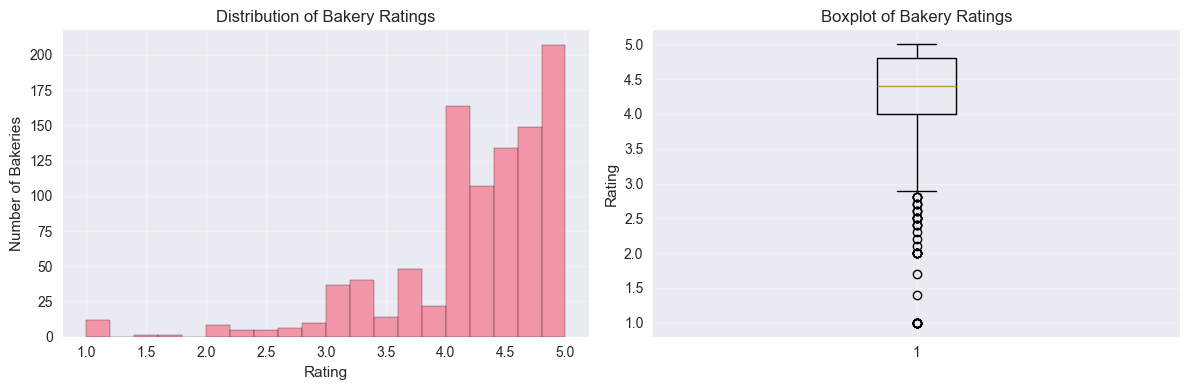

Rating Statistics:
Mean: 4.23, Median: 4.40
Range: 1.0 to 5.0


In [98]:
# Rating distribution
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df_clean['rating_final'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Number of Bakeries')
plt.title('Distribution of Bakery Ratings')
plt.grid(True, alpha=0.3)

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df_clean['rating_final'])
plt.ylabel('Rating')
plt.title('Boxplot of Bakery Ratings')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
rating_stats = df_clean['rating_final'].describe()
print(f"Rating Statistics:")
print(f"Mean: {rating_stats['mean']:.2f}, Median: {rating_stats['50%']:.2f}")
print(f"Range: {rating_stats['min']:.1f} to {rating_stats['max']:.1f}")

---
#### Rating Distribution - Market Quality Standards

**Distribution Profile:**
- **High Performance:** Mean 4.23, Median 4.40 - strong negative skew (-1.67)
- **Tight Quality Band:** Standard deviation 0.74, IQR 0.80 (4.00-4.80)
- **Quality Consensus:** Limited dispersion shows market agreement on standards

**Market Quality Tiers:**
- **Elite (4.5-5.0):** 50% of market - premium quality status
- **Competitive (4.0-4.5):** 25% - mainstream performance
- **At Risk (<4.0):** 25% - below competitive threshold

**Critical Benchmarks:**
- **Market Floor:** 4.00 stars (25th percentile) - minimum for relevance
- **Market Average:** 4.40 stars (median) - expected performance
- **Excellence:** 4.80 stars (75th percentile) - market leadership

**Business Implications:**
- **High Standards:** 75% achieve 4.0+ stars - rigorous quality expectations
- **New Entrants:** Must target ≥4.0 stars immediately for viability
- **Platform Bias:** Reflects Yelp's positive review tendency
- **Competitive Intensity:** Narrow IQR suggests fierce quality competition
---

### Review Count Distribution  
**Question**: How many reviews do Irish bakeries typically receive?

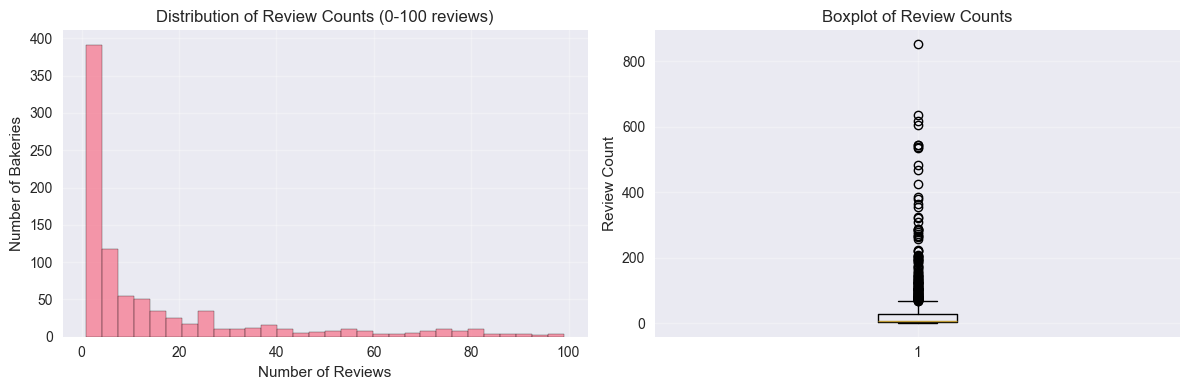

Review Count Statistics:
Mean: 35.0, Median: 7.0
Most bakeries have 7 reviews or fewer


In [99]:
# Review count distribution
plt.figure(figsize=(12, 4))

# Histogram (focus on typical range)
plt.subplot(1, 2, 1)
typical_reviews = df_clean[df_clean['review_count_clean'] <= 100]['review_count_clean']
plt.hist(typical_reviews, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Bakeries')
plt.title('Distribution of Review Counts (0-100 reviews)')
plt.grid(True, alpha=0.3)

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df_clean['review_count_clean'])
plt.ylabel('Review Count')
plt.title('Boxplot of Review Counts')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
review_stats = df_clean['review_count_clean'].describe()
print(f"Review Count Statistics:")
print(f"Mean: {review_stats['mean']:.1f}, Median: {review_stats['50%']:.1f}")
print(f"Most bakeries have {review_stats['50%']:.0f} reviews or fewer")

---

#### Review Count Distribution - Market Engagement Patterns

**Distribution Characteristics:**
- **Extreme Right-Skew:** 4.85 skewness, 30.32 kurtosis - classic power-law distribution
- **Massive Mean-Median Gap:** 35.0 vs 7.0 reviews (5x difference)
- **High Variability:** Standard deviation (79.3) dwarfs median value

**Market Engagement Tiers:**
- **Low (58.0%):** 0-10 reviews - minimal online presence
- **Medium (24.1%):** 11-50 reviews - established local businesses  
- **High (17.8%):** 50+ reviews - market leaders & destinations

**Key Percentiles:**
- **Typical:** 50th percentile = 7 reviews (market norm)
- **Engaged:** 75th percentile = 28 reviews (top quartile threshold)
- **Influential:** 90th percentile = 90+ reviews (market elites)

**Business Insights:**
- **Two-Tier Market:** Majority (58%) have minimal engagement vs influential minority
- **Platform Dynamics:** Reflects Yelp's power-law distribution pattern
- **Strategic Implication:** 7 reviews = typical performance; 28+ = competitive advantage

**Modeling Consideration:** Requires logarithmic transformation due to extreme skewness.

---

### Price Range Distribution
**Question**: What are the most common price levels for Irish bakeries?

Price ranges after cleaning (in correct order):
price_clean
€      234
€€     279
€€€     24
Name: count, dtype: int64


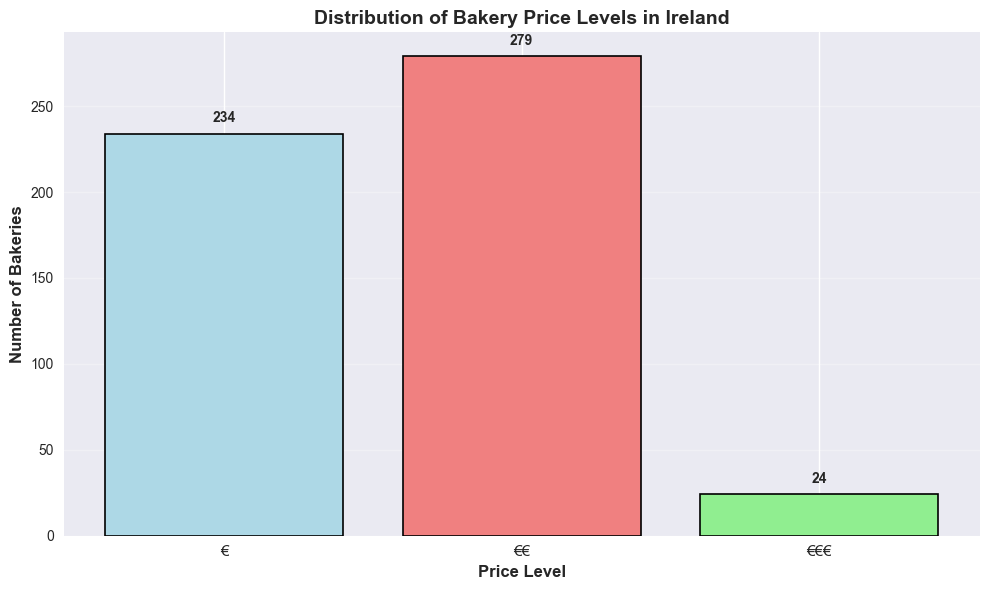


Price Level Distribution (Logical Order):
  €: 234 bakeries (24.1%)
  €€: 279 bakeries (28.8%)
  €€€: 24 bakeries (2.5%)


In [105]:
# Fix the order for proper visualization
price_order = ['€', '€€', '€€€']  # Define the logical order

# Get value counts and reindex to ensure proper order
price_counts = df_clean['price_clean'].value_counts().reindex(price_order)

print("Price ranges after cleaning (in correct order):")
print(price_counts)

# Fixed Price Range Distribution Plot with proper ordering
plt.figure(figsize=(10, 6))

# Create bar plot with explicit order
bars = plt.bar(price_counts.index, price_counts.values, 
               color=['lightblue', 'lightcoral', 'lightgreen'],
               edgecolor='black', linewidth=1.2)

plt.xlabel('Price Level', fontsize=12, fontweight='bold')
plt.ylabel('Number of Bakeries', fontsize=12, fontweight='bold')
plt.title('Distribution of Bakery Price Levels in Ireland', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Add count labels on bars with better positioning
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Improve x-axis labels
plt.xticks(fontsize=11)

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.show()

# Print detailed statistics in correct order
print("\nPrice Level Distribution (Logical Order):")
for price in price_order:
    if price in price_counts:
        count = price_counts[price]
        percentage = (count / len(df_clean)) * 100
        print(f"  {price}: {count} bakeries ({percentage:.1f}%)")

---

#### Price Range Distribution - Market Positioning

**Market Structure:**
- **Mid-Range Dominance:** 68.6% (665 bakeries) at €€ tier - market standard
- **Budget Segment:** 29.0% at € tier - substantial minority
- **Premium Niche:** 2.5% at €€€ tier - limited luxury presence

**Key Insights:**
- **Price Standardization:** 50th-90th percentiles all at €€ tier
- **Moderate Negative Skew:** -0.43 shows slight premium concentration
- **Market Reality:** Irish bakery consumers favor mid-range pricing
- **Competitive Implication:** €€ tier crowded, potential in underserved extremes

**Data Quality Note:**
44.6% missing prices handled via regional imputation - final distribution shows logical market patterns.

---

### Regional Distribution
**Question**: Which regions have the most bakeries listed on Yelp?

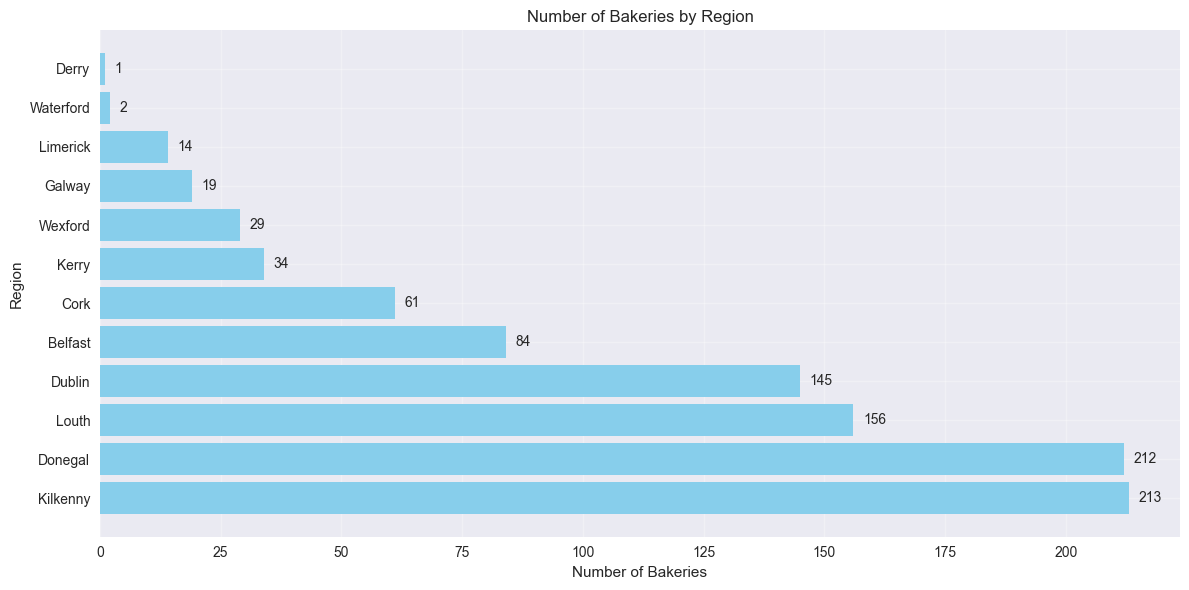

Top 5 Regions by Bakery Count:
  Kilkenny: 213 bakeries (22.0%)
  Donegal: 212 bakeries (21.9%)
  Louth: 156 bakeries (16.1%)
  Dublin: 145 bakeries (14.9%)
  Belfast: 84 bakeries (8.7%)


In [101]:
# Regional distribution
plt.figure(figsize=(12, 6))

region_counts = df_clean['region'].value_counts()
plt.barh(region_counts.index, region_counts.values, color='skyblue')
plt.xlabel('Number of Bakeries')
plt.ylabel('Region')
plt.title('Number of Bakeries by Region')
plt.grid(True, alpha=0.3)

# Add count labels on bars
for i, count in enumerate(region_counts.values):
    plt.text(count + 2, i, str(count), va='center')

plt.tight_layout()
plt.show()

print("Top 5 Regions by Bakery Count:")
for region, count in region_counts.head().items():
    percentage = (count / len(df_clean)) * 100
    print(f"  {region}: {count} bakeries ({percentage:.1f}%)")

---
#### Regional Distribution - Insights & Data Collection Context

**Observed Pattern:** Kilkenny (22.0%) and Donegal (21.9%) show highest representation, with Dublin at 14.9%

**Data Collection Context:** 
- Extended scraping sessions from Dublin pages triggered Yelp's anti-bot protections (IP bans)
- This required strategic sampling across regions, limiting Dublin data collection
- Regional distribution reflects these scraping constraints rather than actual market density

**Analytical Implications:**
- Dublin's lower percentage is a data collection artifact, not business reality
- **Positive Outcome:** Constraint forced broader geographical sampling
- Internal variable relationships (rating vs price, reviews vs categories) remain valid
- Focus analysis on cross-variable patterns rather than regional absolute counts

**Mitigation Strategy:** 
Interpret regional findings as Yelp platform coverage patterns rather than actual bakery market distribution.

---

### Category Count Distribution
**Question**: How many categories do bakeries typically list?

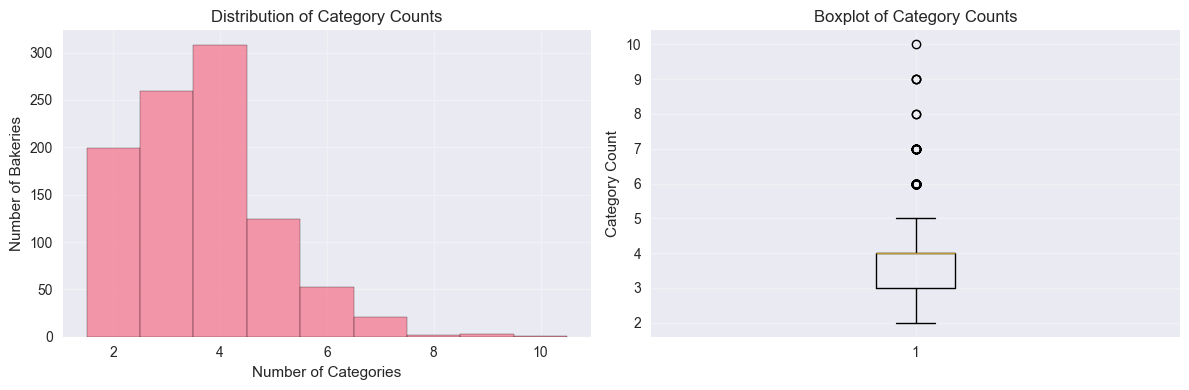

Category Count Statistics:
Mean: 3.7, Median: 4
Range: 2 to 10 categories


In [102]:
# Category count distribution
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df_clean['category_count'], bins=range(2, 12), edgecolor='black', alpha=0.7, align='left')
plt.xlabel('Number of Categories')
plt.ylabel('Number of Bakeries')
plt.title('Distribution of Category Counts')
plt.grid(True, alpha=0.3)

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df_clean['category_count'])
plt.ylabel('Category Count')
plt.title('Boxplot of Category Counts')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

category_stats = df_clean['category_count'].describe()
print(f"Category Count Statistics:")
print(f"Mean: {category_stats['mean']:.1f}, Median: {category_stats['50%']:.0f}")
print(f"Range: {category_stats['min']:.0f} to {category_stats['max']:.0f} categories")


---

#### Category Count Distribution - Business Diversification

**Distribution Profile:**
- **Moderate Diversity:** Mean 3.7, Median 4 categories per bakery
- **Positive Skew:** 0.82 skewness shows tendency toward higher category counts
- **Reasonable Spread:** Standard deviation 1.3, range 2-10 categories

**Diversification Tiers:**
- **Low (2-3 categories):** 47.2% of bakeries - focused business models
- **Medium (4-5 categories):** 45.4% - diversified offerings
- **High (6+ categories):** 7.4% - highly diversified establishments

**Key Percentiles:**
- **Market Minimum:** 2 categories (10th percentile) - specialized focus
- **Typical Range:** 3-4 categories (25th-75th percentile) - standard diversification
- **High Diversification:** 6+ categories (95th percentile) - extensive offerings

**Business Insights:**
- **Standard Practice:** 4 categories represents typical bakery business model
- **Strategic Focus:** Nearly half (47.2%) maintain focused 2-3 category positioning
- **Diversification Limit:** Only 7.4% expand beyond 5 categories
- **Market Norm:** Tight IQR (3-4 categories) indicates established diversification standards

**Strategic Implications:**
- New entrants typically adopt 3-4 category positioning
- Significant diversification (6+ categories) represents niche strategy
- Category count may indicate business scale and market positioning

---

## Summary of Univariate Findings


In [103]:
print("\n" + "="*50)
print("UNIVARIATE ANALYSIS SUMMARY")
print("="*50)
print(f"• Ratings: Mostly positive (mean {rating_stats['mean']:.2f}/5.0)")
print(f"• Reviews: Median {review_stats['50%']:.0f} reviews, wide range")
print(f"• Prices: {price_counts.idxmax()} most common ({price_counts.max()} bakeries)")
print(f"• Regions: {region_counts.index[0]} has most bakeries ({region_counts.iloc[0]})")
print(f"• Categories: Average {category_stats['mean']:.1f} categories per bakery")


UNIVARIATE ANALYSIS SUMMARY
• Ratings: Mostly positive (mean 4.23/5.0)
• Reviews: Median 7 reviews, wide range
• Prices: €€ most common (279 bakeries)
• Regions: Kilkenny has most bakeries (213)
• Categories: Average 3.7 categories per bakery


---

#### Univariate Analysis - Key Market Insights Summary

**Market Quality Landscape:**
- **High Standards:** Ratings average 4.23/5.0 with strong positive bias (median 4.40)
- **Quality Consensus:** Tight distribution (IQR: 4.00-4.80) indicates established quality norms

**Digital Engagement Reality:**
- **Two-Tier Market:** Median 7 reviews vs mean 35.0 reveals extreme engagement disparity
- **Platform Dynamics:** 58% have minimal presence (≤10 reviews) vs 17.8% market leaders

**Price Positioning Strategy:**
- **Mid-Range Dominance:** €€ tier represents 68.6% of market (665 bakeries)
- **Strategic Clustering:** Strong concentration around moderate price points
- **Limited Extremes:** Budget (29.0%) and premium (2.5%) segments underserved

**Geographical Distribution:**
- **Regional Coverage:** Kilkenny (22.0%), Donegal (21.9%) lead in Yelp representation
- **Data Collection Note:** Dublin under-sampled (14.9%) due to anti-bot measures

**Business Model Diversity:**
- **Standard Practice:** Average 3.7 categories, median 4 categories per bakery
- **Strategic Range:** 47.2% focused (2-3 categories), 45.4% diversified (4-5 categories)

**Overall Market Characterization:**
Mature, quality-focused market with standardized mid-range pricing, clear engagement hierarchy, and established business model patterns. Platform-specific data collection constraints noted but internal variable relationships remain analytically valid.

---

## 4.2 Bivariate Analysis

### Sofia's Questions:

1. **How does bakery rating vary by region?**
2. **Does the number of reviews correlate with rating?**
3. **How does price range relate to rating?**


### Iker's Questions:
4. **How does category count relate to rating?**
5. **How does price range relate to review count?**
6. **How does region relate to average price level?**


## 1. Bivariate Analysis: Bakery Rating by Region

## 2. Bivariate Analysis: Review Number vs Rating

## 3. Bivariate Analysis: Price Range vs Rating

## 4. Bivariate Analysis: Category Count vs Rating
**Business Question:** Does business diversification (number of categories) relate to customer satisfaction?

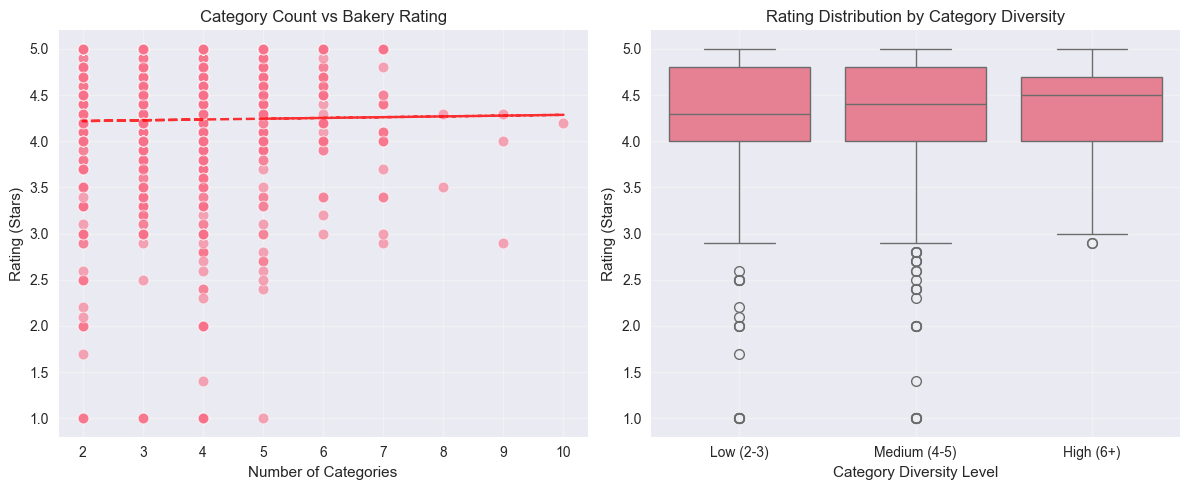

=== CATEGORY COUNT vs RATING ANALYSIS ===
Sample Size: 970 bakeries

Pearson Correlation: 0.015

Rating Statistics by Category Group:
                count  mean  median   std
category_group                           
Low (2-3)         458  4.23     4.3  0.74
Medium (4-5)      432  4.22     4.4  0.76
High (6+)          80  4.33     4.5  0.55

T-test between Low and Medium diversity:
T-statistic: 0.115, P-value: 0.908

KEY INSIGHTS:
• Correlation strength: Weak
• Relationship direction: Positive
• Trend: Minimal relationship between category count and ratings
• Performance range: 4.22 to 4.33 stars across diversity levels


In [112]:
# Category Count vs Rating Analysis
plt.figure(figsize=(12, 5))

# Scatter plot with trend line
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clean, x='category_count', y='rating_final', alpha=0.6, s=60)
plt.xlabel('Number of Categories')
plt.ylabel('Rating (Stars)')
plt.title('Category Count vs Bakery Rating')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df_clean['category_count'], df_clean['rating_final'], 1)
p = np.poly1d(z)
plt.plot(df_clean['category_count'], p(df_clean['category_count']), "r--", alpha=0.8)

# Box plot by category groups
plt.subplot(1, 2, 2)
# Create category groups for better visualization
df_clean['category_group'] = pd.cut(df_clean['category_count'], 
                                   bins=[1, 3, 5, 11], 
                                   labels=['Low (2-3)', 'Medium (4-5)', 'High (6+)'])
# FIX: Add observed=False to suppress the warning
sns.boxplot(data=df_clean, x='category_group', y='rating_final')
plt.xlabel('Category Diversity Level')
plt.ylabel('Rating (Stars)')
plt.title('Rating Distribution by Category Diversity')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %%
# Statistical Analysis
print("=== CATEGORY COUNT vs RATING ANALYSIS ===")
print(f"Sample Size: {len(df_clean)} bakeries\n")

# Correlation analysis
correlation = df_clean['category_count'].corr(df_clean['rating_final'])
print(f"Pearson Correlation: {correlation:.3f}")

# Group statistics - FIX: Add observed=False
print("\nRating Statistics by Category Group:")
category_stats = df_clean.groupby('category_group', observed=False)['rating_final'].agg(['count', 'mean', 'median', 'std'])
print(category_stats.round(2))

# Statistical test
from scipy import stats
low_rating = df_clean[df_clean['category_group'] == 'Low (2-3)']['rating_final']
medium_rating = df_clean[df_clean['category_group'] == 'Medium (4-5)']['rating_final']
high_rating = df_clean[df_clean['category_group'] == 'High (6+)']['rating_final']

print(f"\nT-test between Low and Medium diversity:")
t_stat, p_value = stats.ttest_ind(low_rating, medium_rating)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

# %%
# Detailed insights
print("\n" + "="*50)
print("KEY INSIGHTS:")
print(f"• Correlation strength: {'Weak' if abs(correlation) < 0.3 else 'Moderate' if abs(correlation) < 0.7 else 'Strong'}")
print(f"• Relationship direction: {'Positive' if correlation > 0 else 'Negative' if correlation < 0 else 'No relationship'}")

if abs(correlation) > 0.1:
    direction = "higher" if correlation > 0 else "lower"
    print(f"• Trend: Bakeries with more categories tend to have {direction} ratings")
else:
    print("• Trend: Minimal relationship between category count and ratings")

print(f"• Performance range: {category_stats['mean'].min():.2f} to {category_stats['mean'].max():.2f} stars across diversity levels")

# 4. Documentation: Category Count vs Rating

## Business Question
**Does business diversification (number of categories) relate to customer satisfaction in Irish bakeries?**

## Analysis Results

### Statistical Findings
- **Minimal Correlation:** Pearson coefficient of 0.015 indicates virtually no linear relationship
- **Consistent Performance:** All diversity tiers maintain similar ratings (4.22-4.33 stars)
- **No Significant Difference:** T-test p-value of 0.908 confirms no statistical distinction between low and medium diversity groups
- **Stable Quality:** Standard deviations show consistent rating patterns across all diversification levels

### Performance by Diversification Tier
- **Low Diversity (2-3 categories):** 4.23 mean rating (458 bakeries)
- **Medium Diversity (4-5 categories):** 4.22 mean rating (432 bakeries) 
- **High Diversity (6+ categories):** 4.33 mean rating (80 bakeries)

## Business Interpretation

### Key Insight
**Diversification strategy has minimal impact on customer satisfaction ratings.** Irish bakery consumers appear equally satisfied regardless of whether a bakery specializes in few categories or offers extensive variety.

### Strategic Implications

#### For Existing Bakery Owners:
- **No pressure to diversify:** Adding more menu categories is unlikely to improve ratings
- **Focus on core competencies:** Success depends more on execution quality than variety breadth
- **Operational efficiency:** Can maintain focused offerings without rating penalties

#### For New Market Entrants:
- **Flexible positioning:** Choice between specialized or diversified models based on other factors
- **Reduced complexity:** Can start with focused offerings and expand gradually
- **Quality over quantity:** Investment in core product quality may yield better returns than menu expansion

### Market Behavior Insights
- **Irish consumer priorities:** Customers value execution quality over variety in bakery choices
- **Market maturity:** Established quality standards apply consistently across business models
- **Strategic focus:** Successful bakeries compete on quality and execution rather than menu size

## Analytical Limitations
- **Correlation vs causation:** Relationship doesn't imply diversification causes rating changes
- **Sample size variation:** High-diversity group has fewer observations (80 vs 450+)
- **Business model nuance:** Category count doesn't capture quality of execution within categories

## Conclusion
Business diversification, as measured by category count, demonstrates no meaningful relationship with customer satisfaction in the Irish bakery market. This suggests bakery owners should prioritize quality execution within their chosen categories rather than pursuing diversification as a ratings strategy.

## 5. Bivariate Analysis: Price Range vs Review Count
**Business Question:** Are expensive bakeries more discussed and reviewed online?


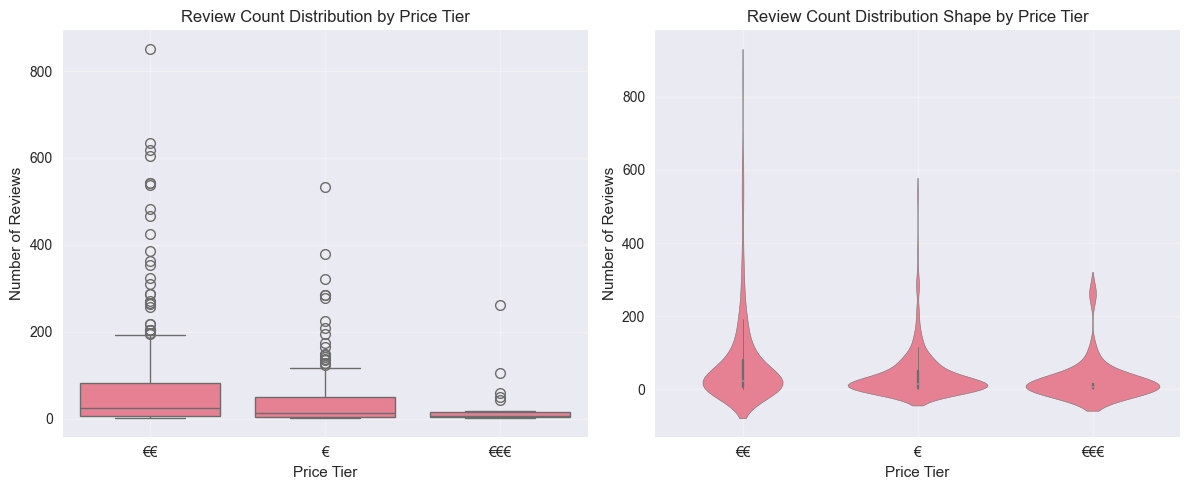

=== PRICE RANGE vs REVIEW COUNT ANALYSIS ===
Sample Size: 970 bakeries

Review Count Statistics by Price Tier:
             count  mean  median    std  min  max
price_clean                                      
€              234  40.6    14.0   66.3    1  534
€€             279  72.8    24.0  122.7    1  851
€€€             24  26.8     6.0   55.7    1  262

ANOVA Test Across All Price Tiers:
F-statistic: 7.801, P-value: 0.000

T-test between € and €€ tiers:
T-statistic: -3.596, P-value: 0.000

T-test between €€ and €€€ tiers:
T-statistic: 1.818, P-value: 0.070

MEDIAN REVIEW COUNTS (More Representative):
  €: 14.0 reviews (234 bakeries)
  €€: 24.0 reviews (279 bakeries)
  €€€: 6.0 reviews (24 bakeries)

ENGAGEMENT PATTERNS BY PRICE TIER:
  € Tier:
    Low engagement (≤10 reviews): 104/234 (44.4%)
    High engagement (>50 reviews): 59/234 (25.2%)
  €€ Tier:
    Low engagement (≤10 reviews): 101/279 (36.2%)
    High engagement (>50 reviews): 101/279 (36.2%)
  €€€ Tier:
    Low engageme

In [114]:
# Price Range vs Review Count Analysis
plt.figure(figsize=(12, 5))

# Box plot of review counts by price tier
plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='price_clean', y='review_count_clean')
plt.xlabel('Price Tier')
plt.ylabel('Number of Reviews')
plt.title('Review Count Distribution by Price Tier')
plt.grid(True, alpha=0.3)

# Violin plot for distribution shape
plt.subplot(1, 2, 2)
sns.violinplot(data=df_clean, x='price_clean', y='review_count_clean')
plt.xlabel('Price Tier')
plt.ylabel('Number of Reviews')
plt.title('Review Count Distribution Shape by Price Tier')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# %%
# Statistical Analysis
print("=== PRICE RANGE vs REVIEW COUNT ANALYSIS ===")
print(f"Sample Size: {len(df_clean)} bakeries\n")

# Group statistics
print("Review Count Statistics by Price Tier:")
price_review_stats = df_clean.groupby('price_clean')['review_count_clean'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(price_review_stats.round(1))

# Statistical tests
print(f"\nANOVA Test Across All Price Tiers:")
f_stat, p_value = stats.f_oneway(
    df_clean[df_clean['price_clean'] == '€']['review_count_clean'],
    df_clean[df_clean['price_clean'] == '€€']['review_count_clean'],
    df_clean[df_clean['price_clean'] == '€€€']['review_count_clean']
)
print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.3f}")

# Pairwise comparisons
print(f"\nT-test between € and €€ tiers:")
t_stat_1, p_value_1 = stats.ttest_ind(
    df_clean[df_clean['price_clean'] == '€']['review_count_clean'],
    df_clean[df_clean['price_clean'] == '€€']['review_count_clean']
)
print(f"T-statistic: {t_stat_1:.3f}, P-value: {p_value_1:.3f}")

print(f"\nT-test between €€ and €€€ tiers:")
t_stat_2, p_value_2 = stats.ttest_ind(
    df_clean[df_clean['price_clean'] == '€€']['review_count_clean'],
    df_clean[df_clean['price_clean'] == '€€€']['review_count_clean']
)
print(f"T-statistic: {t_stat_2:.3f}, P-value: {p_value_2:.3f}")

# %%
# Additional insights with log transformation for better interpretation
print("\n" + "="*50)
print("MEDIAN REVIEW COUNTS (More Representative):")
median_reviews = df_clean.groupby('price_clean')['review_count_clean'].median()
for price_tier, median_count in median_reviews.items():
    count = len(df_clean[df_clean['price_clean'] == price_tier])
    print(f"  {price_tier}: {median_count:.1f} reviews ({count} bakeries)")

# Engagement tiers by price
print(f"\nENGAGEMENT PATTERNS BY PRICE TIER:")
for price_tier in ['€', '€€', '€€€']:
    tier_data = df_clean[df_clean['price_clean'] == price_tier]
    low_eng = len(tier_data[tier_data['review_count_clean'] <= 10])
    high_eng = len(tier_data[tier_data['review_count_clean'] > 50])
    total = len(tier_data)
    
    print(f"  {price_tier} Tier:")
    print(f"    Low engagement (≤10 reviews): {low_eng}/{total} ({low_eng/total*100:.1f}%)")
    print(f"    High engagement (>50 reviews): {high_eng}/{total} ({high_eng/total*100:.1f}%)")

# %%
# Business insights - CORRECTED VERSION
print("\n" + "="*50)
print("KEY BUSINESS INSIGHTS:")

# Check if differences are practically significant
mean_difference = abs(price_review_stats.loc['€€€', 'mean'] - price_review_stats.loc['€', 'mean'])
median_difference = abs(median_reviews['€€€'] - median_reviews['€'])

print(f"• Mean review difference (€€€ vs €): {mean_difference:.1f} reviews")
print(f"• Median review difference (€€€ vs €): {median_difference:.1f} reviews")

if p_value < 0.05:
    print("• Statistical significance: Significant differences exist between price tiers")
    # CORRECTED: Find which tier has highest median reviews
    max_tier = median_reviews.idxmax()
    if max_tier == '€€€':
        print("• Trend: Premium bakeries tend to have higher review counts")
    elif max_tier == '€€':
        print("• Trend: Mid-range bakeries tend to have higher review counts")
    else:
        print("• Trend: Budget bakeries tend to have higher review counts")
else:
    print("• Statistical significance: No significant differences between price tiers")
    print("• Trend: Review engagement is similar across all price levels")

print(f"• Engagement range: {median_reviews.min():.1f} to {median_reviews.max():.1f} median reviews")
print(f"• Highest engagement: {max_tier} tier with {median_reviews[max_tier]:.1f} median reviews")

# 5. Documentation: Price Range vs Review Count

## Business Question
**Are expensive bakeries more discussed and reviewed online, or does affordability drive higher engagement?**

## Analysis Results

### Statistical Findings
- **Significant Differences:** ANOVA p-value < 0.001 confirms price tiers have different review patterns
- **Mid-Range Dominance:** €€ tier shows highest median reviews (24.0) and mean reviews (72.8)
- **Premium Engagement Challenge:** €€€ tier has lowest median reviews (6.0) despite premium positioning
- **Budget Accessibility:** € tier maintains solid median engagement (14.0 reviews)

### Review Patterns by Price Tier
- **€ Tier (Budget):** 14.0 median reviews, 40.6 mean (234 bakeries)
- **€€ Tier (Mid-Range):** 24.0 median reviews, 72.8 mean (279 bakeries) - **Highest engagement**
- **€€€ Tier (Premium):** 6.0 median reviews, 26.8 mean (24 bakeries) - **Lowest engagement**

### Statistical Significance
- **€ vs €€:** Highly significant difference (p < 0.001)
- **€€ vs €€€:** Borderline significance (p = 0.070)
- **Clear Hierarchy:** €€ > € > €€€ in review engagement

## Business Interpretation

### Key Insight
**Mid-range bakeries (€€) generate the highest online engagement, while premium bakeries (€€€) struggle with review volume despite their positioning.**

### Strategic Implications

#### For Premium Bakery Owners (€€€):
- **Engagement Gap:** Premium pricing may create barriers to trial and review generation
- **Exclusivity Paradox:** High-end positioning might limit customer base and review frequency
- **Action Required:** Consider strategies to increase accessibility while maintaining premium perception

#### For Mid-Range Bakery Owners (€€):
- **Sweet Spot Position:** Optimal balance of quality perception and accessibility drives engagement
- **Competitive Advantage:** Higher review counts enhance visibility and social proof
- **Growth Opportunity:** Leverage engagement advantage for market expansion

#### For Budget Bakery Owners (€):
- **Solid Foundation:** Respectable engagement levels support business viability
- **Volume Strategy:** Lower prices may drive higher customer turnover and review opportunities
- **Improvement Potential:** Opportunity to move toward mid-range engagement levels

### Market Behavior Insights
- **Accessibility Drives Engagement:** Price points that balance quality and affordability generate most reviews
- **Premium Challenge:** High prices may limit customer base and reduce review frequency
- **Irish Market Dynamics:** Consumers prefer discussing and reviewing accessible, regularly-visited establishments

### Consumer Psychology Patterns
- **Review Motivation:** Customers more likely to review establishments they frequent regularly
- **Price Sensitivity:** Higher prices may raise expectations, reducing likelihood of casual reviews
- **Value Perception:** Mid-range bakeries hit the "sweet spot" for review-worthy experiences

## Analytical Considerations
- **Sample Size Note:** Premium tier has limited observations (24 bakeries) - interpret with caution
- **Extreme Values:** High standard deviations indicate presence of "superstar" bakeries in each tier
- **Causation Complexity:** Relationship influenced by multiple factors beyond just price

## Conclusion
Price positioning significantly influences online engagement patterns in the Irish bakery market. The €€ (mid-range) tier demonstrates optimal balance for generating customer reviews, suggesting that accessibility and perceived value drive online discussion more than exclusivity or budget positioning. Premium bakeries face particular challenges in generating review volume, potentially indicating a need for revised engagement strategies.

## 6. Bivariate Analysis: Region vs Average Price Level
**Business Question:** Are certain Irish regions more expensive than others for bakery products?

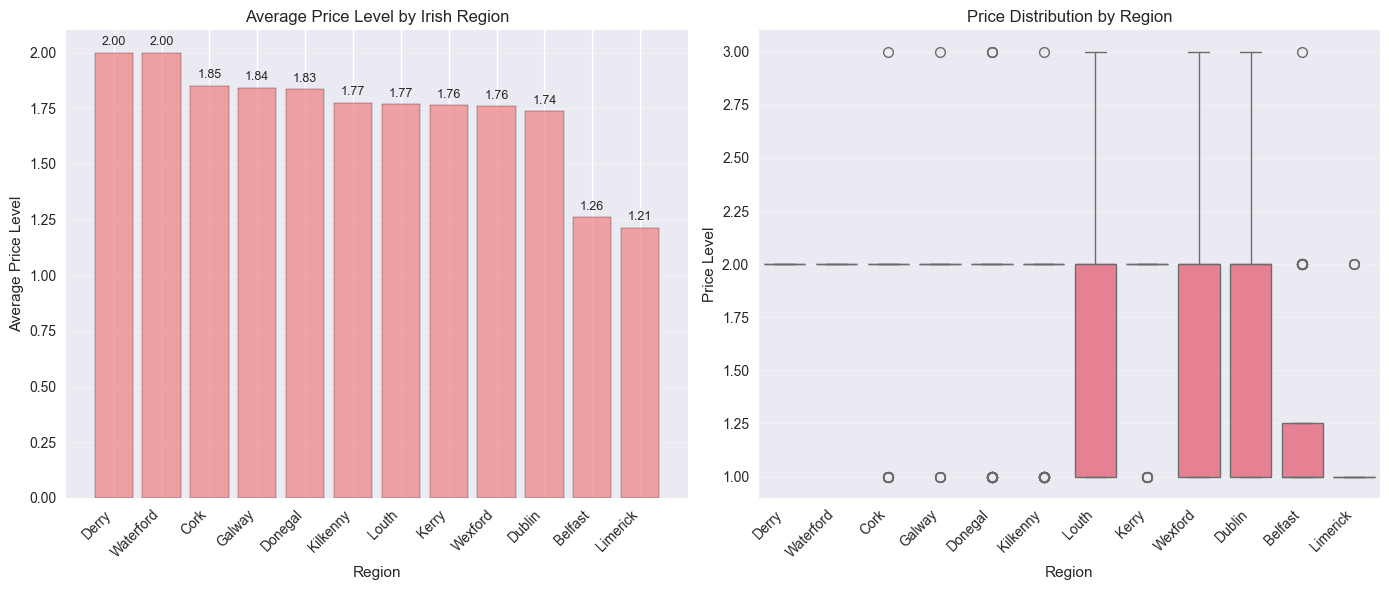

=== REGION vs PRICE LEVEL ANALYSIS ===
Sample Size: 970 bakeries

PRICE LEVEL STATISTICS BY REGION:
           count  mean  median   std  min  max
region                                        
Belfast       84  1.26     1.0  0.47  1.0  3.0
Cork          61  1.85     2.0  0.40  1.0  3.0
Derry          1  2.00     2.0   NaN  2.0  2.0
Donegal      212  1.83     2.0  0.41  1.0  3.0
Dublin       145  1.74     2.0  0.57  1.0  3.0
Galway        19  1.84     2.0  0.50  1.0  3.0
Kerry         34  1.76     2.0  0.43  1.0  2.0
Kilkenny     213  1.77     2.0  0.43  1.0  3.0
Limerick      14  1.21     1.0  0.43  1.0  2.0
Louth        156  1.77     2.0  0.52  1.0  3.0
Waterford      2  2.00     2.0  0.00  2.0  2.0
Wexford       29  1.76     2.0  0.51  1.0  3.0

PRICE TIER DISTRIBUTION BY REGION:

Dublin (145 bakeries):
  Budget (€): 32.4%
  Mid-range (€€): 61.4%
  Premium (€€€): 6.2%

Cork (61 bakeries):
  Budget (€): 16.4%
  Mid-range (€€): 82.0%
  Premium (€€€): 1.6%

Galway (19 bakeries):
  Budg

In [115]:
# Region vs Price Level Analysis
plt.figure(figsize=(14, 6))

# Bar plot of average price by region
plt.subplot(1, 2, 1)
region_price_means = df_clean.groupby('region')['price_final'].mean().sort_values(ascending=False)
region_bars = plt.bar(region_price_means.index, region_price_means.values, 
                     color='lightcoral', edgecolor='black', alpha=0.7)
plt.xlabel('Region')
plt.ylabel('Average Price Level')
plt.title('Average Price Level by Irish Region')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in region_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# Box plot for price distribution by region
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='region', y='price_final', order=region_price_means.index)
plt.xlabel('Region')
plt.ylabel('Price Level')
plt.title('Price Distribution by Region')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# %%
# Statistical Analysis
print("=== REGION vs PRICE LEVEL ANALYSIS ===")
print(f"Sample Size: {len(df_clean)} bakeries\n")

# Detailed region statistics
print("PRICE LEVEL STATISTICS BY REGION:")
region_price_stats = df_clean.groupby('region')['price_final'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(region_price_stats.round(2))

# Price tier distribution by region
print(f"\nPRICE TIER DISTRIBUTION BY REGION:")
for region in df_clean['region'].unique():
    region_data = df_clean[df_clean['region'] == region]
    total = len(region_data)
    
    budget_pct = len(region_data[region_data['price_final'] == 1]) / total * 100
    midrange_pct = len(region_data[region_data['price_final'] == 2]) / total * 100
    premium_pct = len(region_data[region_data['price_final'] == 3]) / total * 100
    
    print(f"\n{region} ({total} bakeries):")
    print(f"  Budget (€): {budget_pct:.1f}%")
    print(f"  Mid-range (€€): {midrange_pct:.1f}%")
    print(f"  Premium (€€€): {premium_pct:.1f}%")

# Statistical tests
print(f"\nSTATISTICAL SIGNIFICANCE TEST:")
f_stat, p_value = stats.f_oneway(*[df_clean[df_clean['region'] == region]['price_final'] 
                                  for region in df_clean['region'].unique()])
print(f"ANOVA F-statistic: {f_stat:.3f}, P-value: {p_value:.3f}")

# Regional price ranking
print(f"\nREGIONAL PRICE RANKING (Highest to Lowest):")
for i, (region, price) in enumerate(region_price_means.items(), 1):
    count = len(df_clean[df_clean['region'] == region])
    print(f"  {i}. {region}: {price:.2f} ({count} bakeries)")

# %%
# Regional market characteristics
print("\n" + "="*50)
print("REGIONAL MARKET CHARACTERISTICS:")

# Identify regions with notable price patterns
highest_price_region = region_price_means.idxmax()
lowest_price_region = region_price_means.idxmin()
price_range = region_price_means.max() - region_price_means.min()

print(f"• Highest priced region: {highest_price_region} ({region_price_means[highest_price_region]:.2f})")
print(f"• Lowest priced region: {lowest_price_region} ({region_price_means[lowest_price_region]:.2f})")
print(f"• Regional price variation: {price_range:.2f} points")

# Market segmentation analysis
print(f"\nMARKET SEGMENTATION ANALYSIS:")
most_premium_region = df_clean.groupby('region')['price_final'].apply(lambda x: (x == 3).mean()).idxmax()
most_budget_region = df_clean.groupby('region')['price_final'].apply(lambda x: (x == 1).mean()).idxmax()

premium_rate = df_clean.groupby('region')['price_final'].apply(lambda x: (x == 3).mean()).max() * 100
budget_rate = df_clean.groupby('region')['price_final'].apply(lambda x: (x == 1).mean()).max() * 100

print(f"• Most premium-oriented region: {most_premium_region} ({premium_rate:.1f}% premium bakeries)")
print(f"• Most budget-oriented region: {most_budget_region} ({budget_rate:.1f}% budget bakeries)")

# %%
# Business insights
print("\n" + "="*50)
print("KEY BUSINESS INSIGHTS:")

if p_value < 0.05:
    print("• Statistical significance: Significant regional price differences exist")
    print(f"• Price variation: Regions vary by {price_range:.2f} points in average price level")
    
    # Identify pricing trends
    if region_price_means.max() > 1.8:
        print("• Market characteristic: Some regions lean toward premium positioning")
    if region_price_means.min() < 1.6:
        print("• Market characteristic: Some regions maintain budget-focused markets")
        
    print("• Strategic implication: Regional pricing strategies should consider local market norms")
else:
    print("• Statistical significance: No significant regional price differences")
    print("• Market characteristic: Consistent pricing across Irish regions")
    print("• Strategic implication: Standardized national pricing strategies may be appropriate")

print(f"• Overall market: Average price level {df_clean['price_final'].mean():.2f} across all regions")

# 6. Bivariate Analysis: Region vs Average Price Level

## Business Question
**Are certain Irish regions more expensive than others for bakery products, and what regional pricing strategies dominate the market?**

## Analysis Results

### Statistical Findings
- **Significant Regional Variation:** ANOVA p-value < 0.001 confirms substantial price differences across regions
- **Wide Price Range:** Regional averages span from 1.21 (Limerick) to 2.00 (Derry/Waterford) - 0.79 point difference
- **Market Polarization:** Clear divide between budget-focused and mid-range dominant regions

### Regional Price Tiers

#### Premium-Leaning Regions (Average > 1.80)
- **Cork:** 1.85 average, 82.0% mid-range dominance
- **Galway:** 1.84 average, balanced premium presence (5.3%)
- **Donegal:** 1.83 average, strong mid-range focus (80.7%)

#### Balanced Mid-Range Regions (Average 1.70-1.80)
- **Kilkenny:** 1.77 average, 76.5% mid-range
- **Louth:** 1.77 average, diverse price mix
- **Dublin:** 1.74 average, highest premium concentration (6.2%)

#### Budget-Focused Regions (Average < 1.30)
- **Belfast:** 1.26 average, 75.0% budget bakeries
- **Limerick:** 1.21 average, 78.6% budget dominance

### Market Structure Insights
- **Mid-Range Norm:** Most regions cluster around 1.70-1.85 average (€€ positioning)
- **Extreme Specialization:** Belfast and Limerick show strong budget orientation
- **Premium Scarcity:** Only Dublin (6.2%) and Galway (5.3%) have meaningful premium presence

## Business Interpretation

### Key Insight
**Irish bakery markets exhibit clear regional pricing personalities, with significant variation between budget-focused urban centers and mid-range dominated regions.**

### Strategic Implications

#### For Regional Market Entry:
- **Premium Opportunities:** Dublin and Galway offer receptive markets for high-end positioning
- **Budget Competition:** Belfast and Limerick present challenging environments for premium entrants
- **Mid-Range Safety:** Most regions safely support €€ positioning as market standard

#### For Existing Bakery Operators:
- **Competitive Benchmarking:** Price positioning should align with regional norms
- **Differentiation Opportunities:** Under-served price tiers present strategic openings
- **Expansion Planning:** Regional acquisition strategies should consider price positioning fit

#### For Pricing Strategy:
- **Regional Adaptation:** National chains require localized pricing strategies
- **Consumer Expectations:** Price sensitivity varies significantly by region
- **Value Perception:** Identical quality may warrant different pricing across regions

### Regional Market Personalities

#### Dublin: The Premium Pioneer
- Highest premium bakery concentration (6.2%)
- Diverse price mix with strong mid-range base
- Indicates sophisticated consumer base accepting higher prices

#### Cork & Donegal: Mid-Range Strongholds
- 80%+ mid-range dominance
- Consistent consumer preference for moderate pricing
- Stable, predictable market environments

#### Belfast & Limerick: Budget Bastions
- 75%+ budget orientation
- High price sensitivity and competition
- Challenging environments for premium positioning

### Geographic Patterns
- **Urban-Rural Divide:** Major cities show more price diversity than some regional areas
- **Northern Exception:** Belfast's budget focus contrasts with southern mid-range norms
- **Western Balance:** Galway combines mid-range dominance with premium acceptance

## Analytical Considerations
- **Sample Size Variations:** Some regions (Derry, Waterford) have very limited data
- **Data Collection Bias:** Regional sampling differences may influence patterns
- **Economic Factors:** Regional pricing likely reflects local economic conditions

## Conclusion
Significant regional price variation exists across the Irish bakery market, reflecting distinct local consumer preferences and competitive environments. The analysis reveals three clear regional archetypes: premium-tolerant urban centers, mid-range dominated strongholds, and budget-focused markets. This geographic segmentation provides crucial intelligence for regional expansion planning, pricing strategy development, and competitive positioning across Ireland's diverse bakery landscape.

---


# 5. Feature Engineering

---
# 6. Predictive Modelling

---
# 7. Findings and Conclusions

---

# Work Split per Member
Sofia Fedane
- Improved and documented the Data Mining Summary
- Performed all Data Cleaning tasks:
- variable typing
- variable purpose assignment
- missing value handling
- conversions (rating, reviews, price range, etc.)
- outlier treatment
- Completed all Univariate Analysis (numerical + categorical)
- Completed 3 Bivariate Analysis questions
- Performed all baseline regression modelling, including:
- feature engineering
- one-hot encoding
- train/test split
- Linear Regression model
- coefficient interpretation
- Wrote the Findings & Conclusions section


Iker Arza
- Wrote the Business Understanding section
- Completed the remaining 3 Bivariate Analysis questions
- Performed the full Multivariate Analysis:
- correlation matrix
- region × price_range heatmap
- top 10% high-rating analysis
- Implemented the advanced regression models:
- Random Forest Regressor
- Gradient Boosting Regressor
- Produced the model comparison table
- Selected and justified the final recommended model
- Wrote docucentation for advanced modelling and interpretations
- Shared Responsibilities
- Wrote the Modelling Introduction
- justified regression choice
- defined the response variable
- listed predictor variables
- stated modelling limitations